In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
import warnings            
warnings.filterwarnings("ignore") 

In [3]:
#2018 ve 2019 yılı dünya üzerindeki en mutlu ülkeler
y_2018 = pd.read_csv("2018.csv");
y_2019 = pd.read_csv("2019.csv");

data = pd.concat([y_2018,y_2019],sort=False)
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [5]:
"""
Overall rank: En mutlu ülkeler sıralaması
Country or region: Ülke veya bölge isimleri
Score: Mutluluk skorları
GDP per capita: Ülkelerin gelir-giderlerini temsil eden bir değer.
Social support : Sosyal destek
Healthy life expectancy : Sağlıklı yaşam imkanı
Freedom to make life choices : Özgürlük
Generosity : Cömertlik 
Perceptions of corruption: Yolsuzluk algıları
"""

'\nOverall rank: En mutlu ülkeler sıralaması\nCountry or region: Ülke veya bölge isimleri\nScore: Mutluluk skorları\nGDP per capita: Ülkelerin gelir-giderlerini temsil eden bir değer.\nSocial support : Sosyal destek\nHealthy life expectancy : Sağlıklı yaşam imkanı\nFreedom to make life choices : Özgürlük\nGenerosity : Cömertlik \nPerceptions of corruption: Yolsuzluk algıları\n'

In [4]:
#Uygun olması için sütun isimlerini değiştiriyoruz.
data.rename(columns={
    "Overall rank": "rank",
    "Country or region": "country",
    "Score": "score",
    "GDP per capita": "gdp",
    "Social support": "social",
    "Healthy life expectancy": "healthy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption"
},inplace=True)
del data["rank"]

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
gdp,312.0,0.898298,0.394592,0.000,0.60950,0.9600,1.21950,2.096
social,312.0,1.211026,0.300310,0.000,1.05575,1.2655,1.45750,1.644
healthy,312.0,0.661295,0.252724,0.000,0.48825,0.6990,0.85800,1.141
freedom,312.0,0.423538,0.156024,0.000,0.32250,0.4495,0.54025,0.724
generosity,312.0,0.182926,0.096739,0.000,0.10875,0.1755,0.24500,0.598
corruption,311.0,0.111299,0.095365,0.000,0.05000,0.0820,0.14050,0.457


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     312 non-null    object 
 1   score       312 non-null    float64
 2   gdp         312 non-null    float64
 3   social      312 non-null    float64
 4   healthy     312 non-null    float64
 5   freedom     312 non-null    float64
 6   generosity  312 non-null    float64
 7   corruption  311 non-null    float64
dtypes: float64(7), object(1)
memory usage: 21.9+ KB


In [9]:
data.columns[data.isnull().any()]

Index(['corruption'], dtype='object')

In [10]:
data.isnull().sum()

country       0
score         0
gdp           0
social        0
healthy       0
freedom       0
generosity    0
corruption    1
dtype: int64

In [11]:
data[data["corruption"].isnull()]

,country,score,gdp,social,healthy,freedom,generosity,corruption
19,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [5]:
avg_data_corruption = data[data["score"] > 6.774].mean().corruption
data.loc[data["corruption"].isnull(),["corruption"]] = avg_data_corruption
data[data["corruption"].isnull()] #filling the empty column

,country,score,gdp,social,healthy,freedom,generosity,corruption


In [6]:
df = data.copy()
df = df.select_dtypes(include=["float64","int64"])
df.head()


,score,gdp,social,healthy,freedom,generosity,corruption
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357


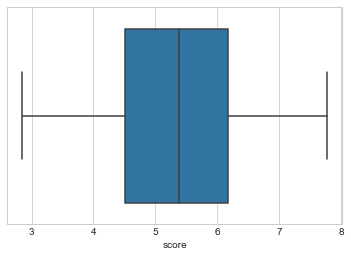

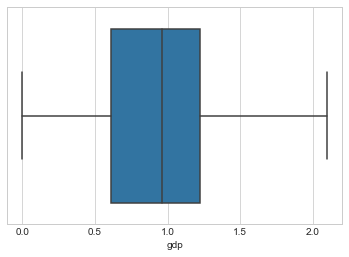

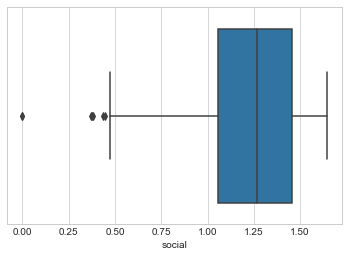

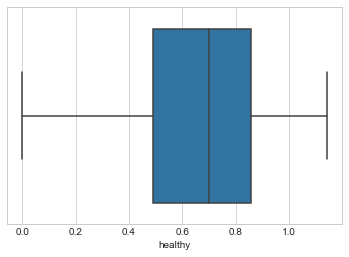

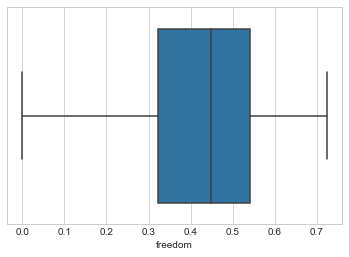

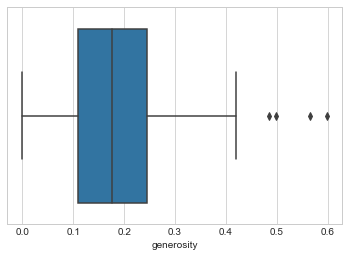

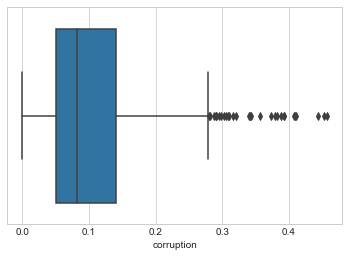

In [6]:
column_list=["score","gdp","social","healthy","freedom","generosity","corruption"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

In [7]:
#"social" ve "corruption" sütunlarında aykırılar var. Bu durum veri setimizi eğitirken 
#bizi negatif bir şekilde etkileyebilir.
#corruption
df_table = df["corruption"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -0.08687499999999997
upper bound is 0.27812499999999996
Q1:  0.05
Q3:  0.14125


In [8]:
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector

0       True
1       True
2       True
3      False
4       True
       ...  
151     True
152    False
153    False
154    False
155    False
Name: corruption, Length: 312, dtype: bool

In [9]:
outliers_vector.sum()

30

In [10]:
outliers_vector = df_table[outliers_vector]
outliers_vector.index.values

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  13,  14,  16,  33,
        75,  97, 150,   0,   1,   2,   4,   5,   6,   7,   8,  10,  13,
        15,  33,  75, 151], dtype=int64)

In [11]:
#Bu data set için dataları silmek uygun bir işlem değil. Bu yüzden aykırıları ortalama değeriyle dolduruyoruz.
df_table = data.copy()
df_table["corruption"].iloc[outliers_vector.index.values] = df_table["corruption"].mean()
df_table["corruption"].iloc[outliers_vector.index.values]

0      0.111794
1      0.111794
2      0.111794
4      0.111794
5      0.111794
6      0.111794
7      0.111794
8      0.111794
9      0.111794
13     0.111794
14     0.111794
16     0.111794
33     0.111794
75     0.111794
97     0.111794
150    0.111794
0      0.111794
1      0.111794
2      0.111794
4      0.111794
5      0.111794
6      0.111794
7      0.111794
8      0.111794
10     0.111794
13     0.111794
15     0.111794
33     0.111794
75     0.111794
151    0.111794
Name: corruption, dtype: float64

In [12]:
data = df_table

BASİT DOĞRUSAL REGRESYON

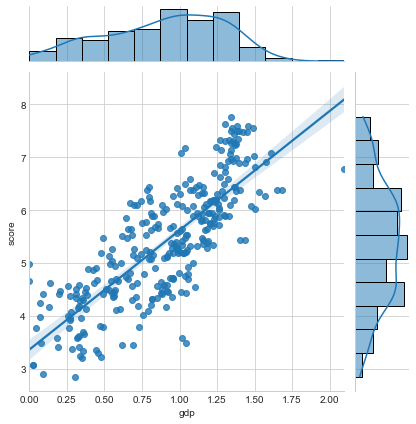

In [21]:
#gelir-gider durumuyla skor arasındaki ilişkiye bakalım."gdp","score".
sns.jointplot(x="gdp",y="score",data=df_table,kind="reg")
plt.show()

In [7]:
#İki değişken arasındaki ilişkiyi analiz etmek için lineer regresyon istatistik modelini kullanacağız.
from sklearn.linear_model import LinearRegression

X = data[["gdp"]]
X.head

<bound method NDFrame.head of        gdp
0    1.305
1    1.456
2    1.351
3    1.343
4    1.420
..     ...
151  0.359
152  0.476
153  0.350
154  0.026
155  0.306

[312 rows x 1 columns]>

In [23]:
y = data[["score"]]
y.head

<bound method NDFrame.head of      score
0    7.632
1    7.594
2    7.555
3    7.495
4    7.487
..     ...
151  3.334
152  3.231
153  3.203
154  3.083
155  2.853

[312 rows x 1 columns]>

In [24]:
reg = LinearRegression()
model = reg.fit(X,y)
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("rscore. ", model.score(X,y))

intercept:  [3.36665334]
coef:  [[2.25409931]]
rscore.  0.6367680251195655


In [95]:
#rscore'dan görüleceği gibi gdp veri setinin %63'ünü açıklıyor.

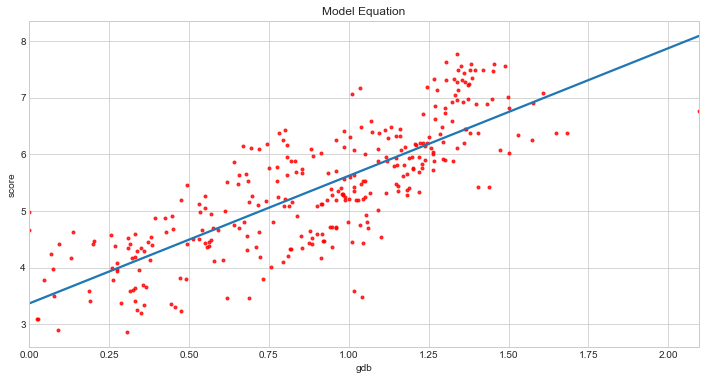

In [25]:
plt.figure(figsize=(12,6))
g = sns.regplot(x=data["gdp"],y=data["score"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("score")
g.set_xlabel("gdb")
plt.show()

In [26]:
#Farklı gdp değerlerinde ülkelerin mutluluk değerleri ne kadar tahmin etmeye çalışıyoruz.
gdb_list = [[0.25],[0.50],[0.75],[1.00],[1.25],[1.50]]
model.predict(gdb_list)
for g in gdb_list:
    print("The happiness value of the country with a gdp value of ",g,": ",model.predict([g]))

The happiness value of the country with a gdp value of  [0.25] :  [[3.93017816]]
The happiness value of the country with a gdp value of  [0.5] :  [[4.49370299]]
The happiness value of the country with a gdp value of  [0.75] :  [[5.05722782]]
The happiness value of the country with a gdp value of  [1.0] :  [[5.62075264]]
The happiness value of the country with a gdp value of  [1.25] :  [[6.18427747]]
The happiness value of the country with a gdp value of  [1.5] :  [[6.7478023]]


In [59]:
#Diğer değerler için de teker teker tahminler yapmak bizi uğraştıracağı için bir fonksiyon oluşturuyoruz.
def linear_reg(col,text,prdctn):
    #Tahmin ve grafikte gösterimi.
    sns.jointplot(x=col,y="score",data=df_table,kind="reg")
    plt.show()
    
    X = data[[col]] 
    y = data[["score"]]
    reg = LinearRegression()
    model = reg.fit(X,y)
    plt.show()
    
    plt.figure(figsize=(12,6))
    g = sns.regplot(x=data[col],y=data["score"],ci=None,scatter_kws={'color': 'r','s':12})
    g.set_title("Tahmin Modeli")
    g.set_xlabel(col)
    g.set_ylabel("score")
    print(text," : ",model.predict([[prdctn]]))
    

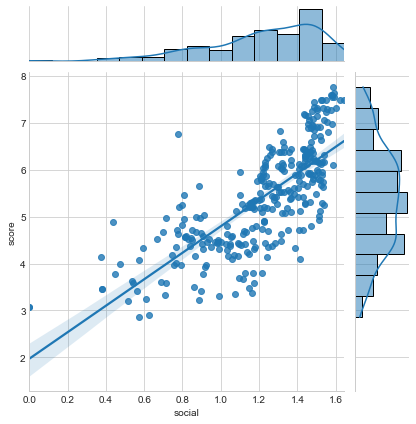

Sosyal destek değeri 2 olan ülkenin mutluluk skoru:  :  [[7.62022176]]


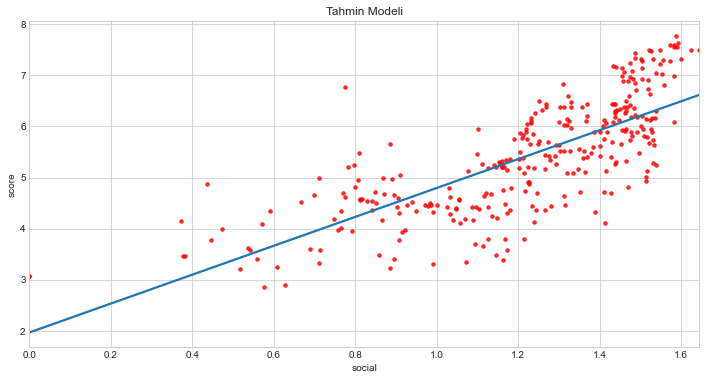

In [60]:
linear_reg("social","Sosyal destek değeri 2 olan ülkenin mutluluk skoru:",2)

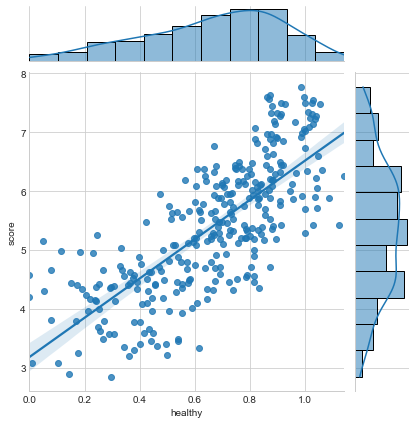

Sağlık yaşam olanak değeri 1.20 olan ülkenin mutluluk skoru:  :  [[7.18742031]]


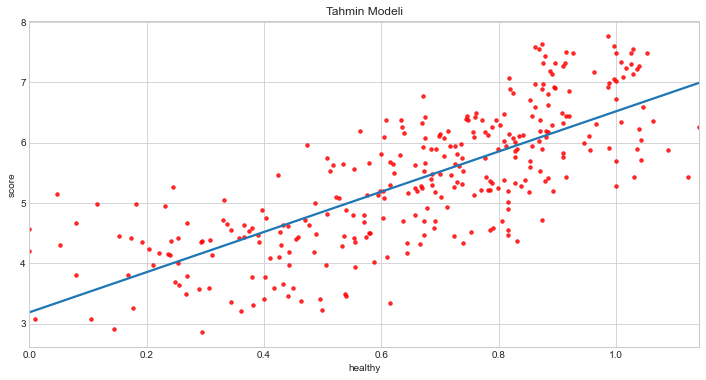

In [61]:
#Sağlık imkanı ile ilişkisi
linear_reg("healthy","Sağlık yaşam olanak değeri 1.20 olan ülkenin mutluluk skoru:",1.20)

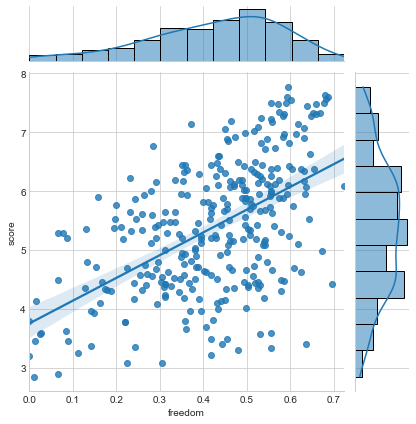

Özgürlük puan 0.9 olan ülkenin mutluluk skoru:  :  [[7.22922514]]


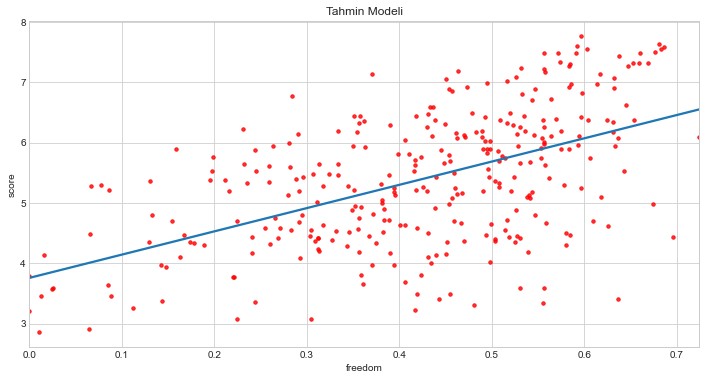

In [63]:
#Özgürlükle ilişkisi
linear_reg("freedom","Özgürlük puan 0.9 olan ülkenin mutluluk skoru:",0.9)

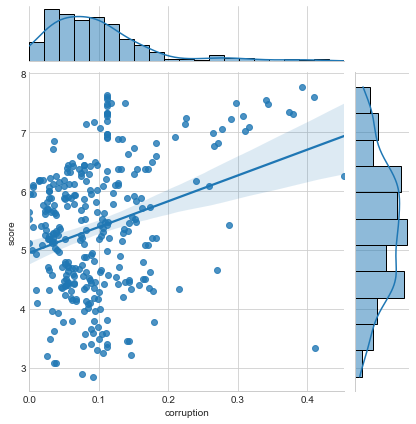

Yolsuzluk puanı 0.45 olan ülkenin mutluluk skoru:  :  [[6.92300931]]


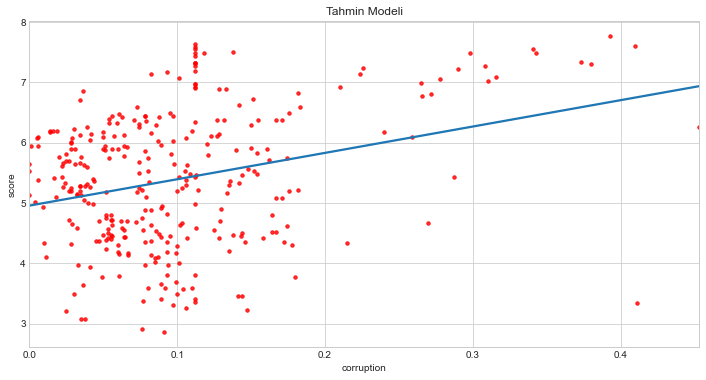

In [64]:
#Yolsuzlukla ilişkisi
linear_reg("corruption","Yolsuzluk puanı 0.45 olan ülkenin mutluluk skoru:",0.45)

In [65]:
#Yolsuzluğun mutluluğa etkisi hakkında direk bir bağlantı kuramıyoruz ama en büyük yolsuzluklar 
#mutluluk skoru yüksek(gelişmiş ülkeler de diyebiliriz) ülkelerde yaşanıyor diyebiliriz.

ÇOKLU DOĞRUSAL REGRESYON

In [2]:
#Asıl amaç bağımlı ve bağımsız değişkenler arasındaki ilişkiyi açıklayan lineer fonksiyonu bulmak.

In [14]:
import statsmodels.api as sms

X = df.drop("score",axis=1)
y = df["score"]

# OLS(bağımlı,bağımsız)
lm = sms.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  score   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3622.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                   7.57e-281
Time:                        18:50:22   Log-Likelihood:                         -307.69
No. Observations:                 312   AIC:                                      627.4
Df Residuals:                     306   BIC:                                      649.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gdp            0.5774      0.178      3.238      0.001       0.226       0.928
social         2.2624      0.153     14.780      0.000       1.961       2.564
healthy        1.2506      0.260      4.805      0.000       0.738       1.763
freedom        1.8640      0.289      6.447      0.000       1.295       2.433
generosity     2.0380      0.399      5.109      0.000       1.253       2.823
corruption     0.5464      0.468      1.169      0.243      -0.374       1.466
==============================================================================
Omnibus:                        6.324   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                7.204
Skew:                           0.212   Prob(JB):                       0.0273
Kurtosis:                       3.612   Cond. No.                         24.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared: Bağımlı değişkenlerdeki değişimi açıklayan bağımsız değişken yüzdesi.
coef: Katsayılar.

Yorum olarak şunları söyleyebiliriz;
Eğer ki 'gdp' değeri 1 artarsa skorda 0.5774 artar.
Eğer ki 'social' değeri 1 artarsa skorda 2.2624 artar.

In [15]:
#scikit learn ile model yapma.

lm = LinearRegression()
model = lm.fit(X,y)
print("sabit: ",model.intercept_)
print("katsayılar: ",model.coef_)

sabit:  1.8541077926951255
katsayılar:  [0.929921   1.06504217 0.94321492 1.40426054 0.52070628 0.88114008]


In [16]:
#TAHMİN
#Score = 0.929921*gdp + 1.06504217*social + 0.94321492*healthy + 1.40426054*freedom 
#+ 0.52070628*generosity + 0.88114008*corruption

new_data = [[1],[2],[1.25],[1.75],[1.50],[0.75]]
new_data = pd.DataFrame(new_data).T
model.predict(new_data)

array([9.99250222])

In [17]:
#hata sayısını hesaplıyoruz.
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y,model.predict(X))
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  0.26768307316350287
RMSE:  0.5173809748758673


Model Tuning

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop("score",axis=1)
y = df["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,gdp,social,healthy,freedom,generosity,corruption
111,0.916,0.817,0.790,0.419,0.149,0.032
52,1.187,1.465,0.812,0.264,0.075,0.064
145,1.017,1.174,0.417,0.557,0.042,0.092
47,1.162,1.232,0.825,0.462,0.083,0.005
78,1.154,1.202,0.879,0.131,0.000,0.044


In [19]:
X_test.head()

,gdp,social,healthy,freedom,generosity,corruption
72,1.051,1.361,0.871,0.197,0.142,0.080
9,1.340,1.573,0.910,0.647,0.361,0.302
57,1.229,1.211,0.909,0.495,0.179,0.154
60,1.229,1.191,0.909,0.423,0.202,0.035
25,1.365,1.436,0.857,0.418,0.151,0.078


In [20]:
y_train.head()

111    4.586
52     5.940
145    3.590
47     6.070
78     5.358
Name: score, dtype: float64

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Eğitim hatası",np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print("Test hatası",np.sqrt(mean_squared_error(y_test,model.predict(X_test))))

Eğitim hatası 0.5286863282545513
Test hatası 0.4700442336475783


In [22]:
#İlk başta tanımladığımız random_state değerini her değiştirdiğimizde, 
#farklı bir sonuç döner. Bunlardan hangisinin en iyi sonucu verdiğini 
#bulmamız gerekiyor. Bunun için şunları yapmamız gerekiyor.

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

array([-0.38049606, -0.23987782, -0.24029   , -0.41370114, -0.16258143,
       -0.37149593, -0.25642041, -0.39761278, -0.21403289, -0.29719585])

In [24]:
cvs_avg_mse = np.mean(-cross_val_score(model, X_train, y_train, cv=20, scoring="neg_mean_squared_error"))
cvs_avg_rmse = np.sqrt(cvs_avg_mse)

print("Cross Val Score MSE = ",cvs_avg_mse)
print("Cross Val Score RMSE = ",cvs_avg_rmse)

Cross Val Score MSE =  0.2945486894707848
Cross Val Score RMSE =  0.5427234005188875


RIDGE REGRESYON

In [25]:
#Amaç, bu katsayılara ceza uygulayarak hata karelerinin toplamını minimize eden katsayıları bulmaktır.
#Overfittinge karşı dayanıklıdır.
#Önyargılıdır ancak varyansı düşüktür.
#Çok fazla parametre olduğunda OLS'den daha iyidir.
#Tüm değişkenlerle bir model oluşturur. İlişkili olmayan değişkenleri modelin dışında bırakmaz, 
#katsayılarını sıfıra yaklaştırır.

#Formülde delta parametresi seçilmiş en küçük "cross validation" değerini verir.
#Delta seçilince tekrar gözlemlere uygun hale gelir.

In [26]:
#Ridge Regresyon - Model
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

X = df.drop("score",axis=1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [27]:
ridge_model.coef_

array([0.94225637, 1.02043421, 0.93689001, 1.44712035, 0.35979844,
       0.97107389])

In [28]:
#Her katsayıya bir alfa değeri eklenecektir. Hata katsayıları bu katsayılara göre incelenecektir.

In [29]:
ridge_model.intercept_

1.9108156265652139

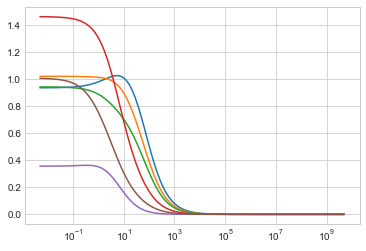

In [34]:
lambdas = 10**np.linspace(10,-2,100)*0.5  #Random sayılar üretecek.
ridge_model =  Ridge()
coefs = []

for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    coefs.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale("log")

In [35]:
# Farklı beta değerlerinin aksine veri setimizdeki değişkenlerin katsayılarındaki değişiklikler 
# yukarıdaki grafikte görülmektedir. Görüldüğü gibi katsayılar arttıkça sıfıra yaklaşmaktadır.

In [38]:
# Ridge Regresyon - Tahmin
ridge_model = Ridge().fit(X_train,y_train)

y_pred = ridge_model.predict(X_train)

print("Tahmin değerleri: ", y_pred[0:10])
print("Gerçek değerler: ", y_train[0:10].values)

Tahmin değerleri:  [5.05318836 5.79071673 5.37059901 5.75868845 5.33588452 5.47787414
 5.95562654 5.72047349 6.84044342 6.15987674]
Gerçek değerler:  [4.586 5.94  3.59  6.07  5.358 5.208 5.79  5.191 7.328 6.375]


In [41]:
RMSE = np.mean(mean_squared_error(y_train,y_pred)) # rmse = hata karelerinin ortalamasının karekökü
print("Eğitim hatası: ", RMSE)

Eğitim hatası:  0.28067189344529464


In [42]:
Verified_RMSE = np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=20, scoring="neg_mean_squared_error")))
print("Doğrulanan RMSE: ", Verified_RMSE)

Doğrulanan RMSE:  0.5410728899647692


In [43]:
#Yukarıda iki değer var. Bunlardan biri doğrulanmamış, diğeri doğrulanmış hata karelerinin
#toplamının karekökünü temsil eden değerlerdir. Gördüğünüz gibi, doğrulanmamış değer, 
#doğrulanmış değerin neredeyse yarısıdır. Bu sonuç bize hata karelerinin ortalamasının 
#karekökünü alırken birinci yöntemi değil ikinci yöntemi kullanmanın daha doğru olduğunu göstermektedir.

In [44]:
# test hatası
y_pred = ridge_model.predict(X_test)
RMSE = np.mean(mean_squared_error(y_test,y_pred))
print("test hatası: ", RMSE)

test hatası:  0.22371217702527899


In [45]:
#Model Tuning
ridge_model = Ridge(10).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5102254754869214

In [46]:
ridge_model = Ridge(30).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.598360248867311

In [47]:
ridge_model = Ridge(90).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.7710248515673939

In [48]:
# Deneme yoluyla hangi değer daha iyi çalışıyor bulabiliriz. Fakat aşağıda 
# kullandığımız metodla en doğru ve uygun değeri hızlı ve kolay bir şekilde bulabiliriz.

In [49]:
lambdas1 = 10**np.linspace(10,-2,100)
lambdas2 = np.random.randint(0,1000,100)

ridgeCV = RidgeCV(alphas = lambdas1,scoring = "neg_mean_squared_error", cv=10, normalize=True)
ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [50]:
#alpha_ özelliğini kullanarak en uygun değeri çekebiliriz.
ridgeCV.alpha_

0.0932603346883218

In [51]:
# final modeli
ridge_tuned = Ridge(alpha = ridgeCV.alpha_).fit(X_train,y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.4739437357393686

In [52]:
# lambdas2 için
ridgeCV = RidgeCV(alphas = lambdas2,scoring = "neg_mean_squared_error", cv=10, normalize=True)
ridgeCV.fit(X_train,y_train)
ridge_tuned = Ridge(alpha = ridgeCV.alpha_).fit(X_train,y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.48264839372336626

LASSO REGRESYON

In [9]:
#Ürettiği modelin tahmin doğruluğunu ve yorumlanabilirliğini arttırmak için hem değişken seçimi
#hem de regularization yapar. Aynı ridge regresyonda olduğu gibi amaç hata kareler toplamını
#minimize eden katsayıları, katsayılara ceza uygularayarak bulmaktır. Fakat ridge regresyondan
#farklı olarak ilgisiz değişkenlerin katsayılarını sıfıra eşitler.
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV

X = df.drop("score",axis=1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lasso_model = Lasso().fit(X_train,y_train)
print("intercept: ", lasso_model.intercept_)
print("coef: ", lasso_model.coef_)

intercept:  5.346196172248804
coef:  [0. 0. 0. 0. 0. 0.]


In [10]:
alphas = np.random.randint(0,10000,10) #Farklı lambda değerleri için katsayılar
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

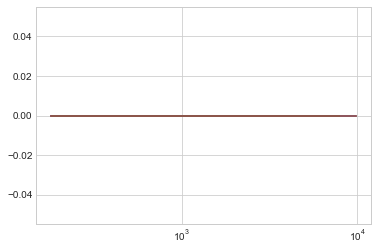

In [11]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [13]:
#Tahmin
lasso_model.predict(X_train)[0:5]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [14]:
lasso_model.predict(X_test)[0:5]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [15]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.108776315534746

In [16]:
r2_score(y_test,y_pred)

-0.015561293164185752

In [17]:
#Model Tuning
lasso_cv_model = LassoCV(cv=10,max_iter=100000).fit(X_train,y_train)
lasso_cv_model

LassoCV(cv=10, max_iter=100000)

In [18]:
lasso_cv_model.alpha_

0.0026847466799991312

In [19]:
lasso_tuned = Lasso().set_params(alpha= lasso_cv_model.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5394427335399019

ELASTICNET REGRESYON

In [20]:
#ElasticNet, L1 ve L2 yaklaşımlarını birleştirir. Ridge regresyon tarzı cezalandırma ve 
#lasso regresyon tarzında değişken seçimi yapar.
#Model ve tahmin
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

X = df.drop("score",axis=1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

enet_model = ElasticNet().fit(X_train,y_train)

In [21]:
enet_model.coef_

array([0., 0., 0., 0., 0., 0.])

In [22]:
enet_model.intercept_

5.346196172248804

In [23]:
enet_model.predict(X_train)[0:10]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617,
       5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [24]:
enet_model.predict(X_test)[0:10]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617,
       5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [25]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.108776315534746